In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('covid_info.csv')

In [3]:
data.Sido

0           Seoul
1           Busan
2           Daegu
3         Incheon
4         Gwangju
5         Daejeon
6           Ulsan
7        Gyeonggi
8         Gangwon
9     Chungcheong
10          Honam
11       Yeongnam
12           Jeju
Name: Sido, dtype: object

In [4]:
num=[0,1,2,3,4,5,6,7,8,9,10,11,12]

In [5]:
data['Sido_num'] = num

In [6]:
data.head()

,Sido,Density,HospitalNum,PatientNum,Sido_num
0,Seoul,16541,134,13035,0
1,Busan,4380,77,1338,1
2,Daegu,2753,36,7411,2
3,Incheon,2769,65,1999,3
4,Gwangju,2980,22,829,4


In [7]:
sns.set_style('ticks')

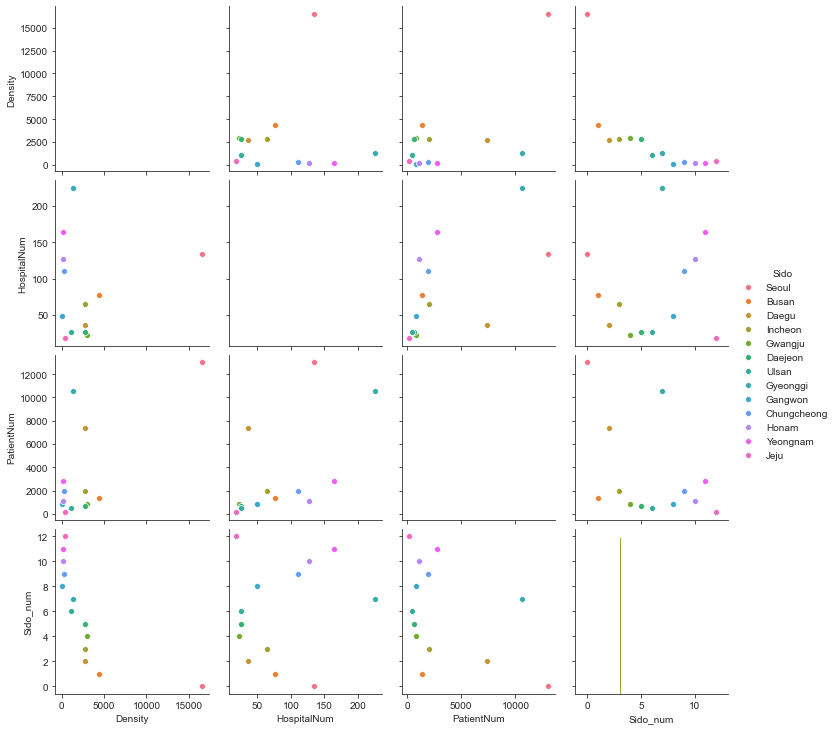

In [8]:
sns.pairplot(data, diag_kind='hist',hue = 'Sido', palette='husl');
fig = plt.gcf() #변경한 곳
plt.show()


In [9]:
fig.savefig('scatter_matrix.png')

In [10]:
num=[0,1,2,3,4,5,6,7,8,9,10,11,12]

In [11]:
data2 = data.copy()

In [12]:
data2['Sido_num'] = num

In [13]:
import statsmodels.api as sm

In [14]:
data2.describe()

,Density,HospitalNum,PatientNum,Sido_num
count,13.000000,13.00000,13.000000,13.00000
mean,2744.384615,83.00000,3318.307692,6.00000
std,4377.471141,64.65292,4225.026201,3.89444
min,90.000000,18.00000,142.000000,0.00000
25%,252.000000,26.00000,829.000000,3.00000
50%,1299.000000,65.00000,1338.000000,6.00000
75%,2796.000000,127.00000,2798.000000,9.00000
max,16541.000000,225.00000,13035.000000,12.00000


In [15]:
RX = sm.add_constant(data2.PatientNum)
results = sm.OLS(data2.HospitalNum, RX).fit()

In [16]:
results.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HospitalNum   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     5.990
Date:                Mon, 21 Dec 2020   Prob (F-statistic):             0.0324
Time:                        16:26:17   Log-Likelihood:                -69.298
No. Observations:                  13   AIC:                             142.6
Df Residuals:                      11   BIC:                             143.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8499     19.464      2.715      0.020      10.009      95.691
PatientNum     0.0091      0.004      2.447      0.032       0.001       0.017
==============================================================================
Omnibus:                        0.914   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.779
Skew:                           0.357   Prob(JB):                        0.677
Kurtosis:                       2.037   Cond. No.                     6.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

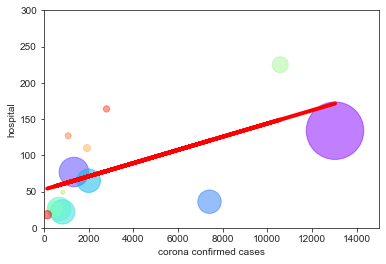

In [17]:
plt.scatter(data2.PatientNum, data2.HospitalNum,s=data2.Density/5, c = data2.Sido_num,cmap = plt.cm.rainbow, alpha = 0.5)
line = 0.0091 * data2.PatientNum + 52.8499
plt.plot(data2.PatientNum, line, c='red', lw=4)
plt.xlabel('corona confirmed cases')
plt.ylabel('hospital')
plt.xlim(0,15000)
plt.ylim(0,300)
fig = plt.gcf() #변경한 곳
plt.show()

In [18]:
fig.savefig('scatter.png');